In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data():
    with open('./testSet.txt') as f:
        x_data_set = []
        y_data_set = []
        for line in f.readlines():
            l = line.strip().split()
            # x0, x1, x2
            x_data_set.append([1.0, float(l[0]), float(l[1])])
            y_data_set.append(int(l[2]))
        return x_data_set, y_data_set
x_data_set, y_data_set = load_data()


In [3]:
# sigmoid 函数
# 激活函数保证结果在 0 - 1 之间
def sigmoid(in_x):
    res = 1.0 / (1.0 + np.exp(-in_x))
    return res

In [4]:
# 梯度上升 w = w + l * grad(f(w))
# 其使用梯度下降也一样
def grad_ascent_1(x_train, y_train):
    l_rate = 0.001 # 学习率，步长
    # 终于 numpy 了嗷
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    epoch   = 500
    w       = np.ones(x_train.shape[1]) # 待训练的权重
    for i in range(epoch):
        r     = sigmoid(np.dot(x_train, w)) # 这个还没有 bias
        error = y_train - r
        w     = w - l_rate * np.dot(-error, x_train) # 详见李宏毅 ppt 了。以前好歹是写过的 而且对线代还是要有了解
#         w     = w + l_rate * np.dot(error, x_train)
    return w

w1 = grad_ascent_1(x_data_set, y_data_set)

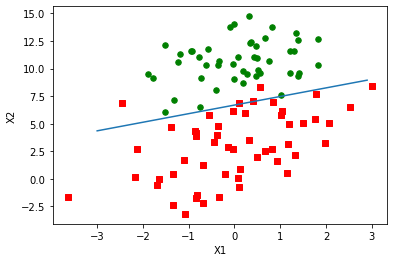

In [5]:
def best_fit(w):
    x_data, y_data = load_data()
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    sample_num = x_data.shape[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(sample_num):
        if y_data[i] == 1:
            # x11, x12 = xcord1 , ycord1
            xcord1.append(x_data[i, 1]); ycord1.append(x_data[i, 2])
        else:
            # x21, x22 = xcord2, ycord2
            xcord2.append(x_data[i, 1]); ycord2.append(x_data[i, 2])
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x1 = np.arange(-3.0, 3.0, 0.1)
    x2 = (-w[0] - w[1] * x1 ) / w[2] # 设 sigmoid  = 0 = w0x0 + w1x1 + w2x2 因为 0 是在 sig 中是分界点
    ax.plot(x1, x2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
best_fit(w1)

In [6]:
a = np.array([[1, 22], [23,34]])
a[0, 1]

22

如上的梯度上升效果还不错，但是如果数据量上去了，训练会很慢，利用随机梯度上升可以提高训练速度。

其实梯度上升和梯度下降一回事。

E:\ProgramData\Anaconda3\envs\ml_py36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


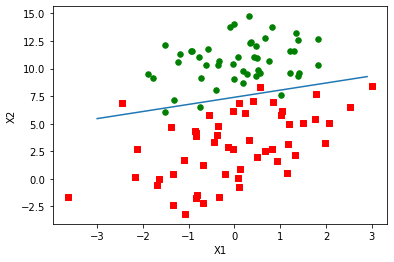

In [7]:
# 随机梯度下降，原本是全部数据集计算后更新一次参数，这回是一个样本就更新一次
# 这样一次训练，其实就训练了 sample_num 次
# 而普通的梯度下降，一次就是一次，但是计算了 sample_num 次。
def sgd(x_train, y_train, epoch = 150):
    x_train = np.array(x_train)
    y_train = np.array(y_train)
#     l_rate = 0.001
    w      = np.ones(x_train.shape[1])
    
    sample_num = x_train.shape[0]
    order  = np.arange(0, sample_num)
    for i in range(150):
        np.random.shuffle(order)
        j = 0
        for index in order:
            # 同时学习率其实应该也要随着训练而变化
            # 如下公式，保证了 l_rate 不是严格下降，因为 i 定 j 增，到了下一轮会有学习率比上一轮来的大
            l_rate = 4.0 / (1.0 + i + j) + 0.01
            # 其中一个样本
            r     = sigmoid(np.dot(x_train[index], w))
            error = y_train[index] - r
#             w     = w - l_rate * np.dot(-error, x_train[index])
            w     = w - l_rate * -error * x_train[index]
            j += 1
    return w
w2 = sgd(x_data_set, y_data_set)
best_fit(w2)

In [8]:
x = np.arange(0, 100)
np.random.shuffle(x)
x

array([30, 56, 35, 46,  9,  3, 87, 73, 98, 11, 77, 34,  6, 62, 72, 64,  7,
       45, 83, 43, 48, 10,  4, 96, 81, 12, 97, 92, 24, 93,  8, 52, 55, 40,
       21, 18, 53, 90, 15, 59, 26, 61, 95, 20, 66, 49, 57, 31, 51,  1,  0,
       36, 44, 75, 25,  5, 94, 86, 42, 58, 69, 16, 91, 99, 50, 17, 82, 89,
       76, 74, 79,  2, 65, 47, 63, 68, 22, 19, 38, 70, 39, 67, 29, 88, 28,
       32, 13, 60, 14, 78, 71, 33, 84, 37, 27, 54, 80, 85, 23, 41])

好了，开始给例子了。

首先对于一个数据集，需要做一些预处理。除了变成能处理的数据结构外，就是要处理缺失值。(其实这可能是特征工程需要学习的内容)

对于缺失值，有几种解决方式。
1. 用该特征的均值来补
2. 用特殊的特征值，如 -1
3. 忽略这个样本
4. 用相似的样本值来代替
5. 用另外的算法预测缺失值


在本例子中， 用 0 作为缺失值就好。对于 sigmoid 函数来说，输入 0 也就是 0.5，说明没有偏向预测。

可以了，需要开始利用 logic regression 来进行分类预测。


In [9]:
# input - np.darray
def classify(x_test, w):
    r = sigmoid(np.dot(x_test, w))
    return r


In [10]:
def pre():
    with open('./horseColicTraining.txt', 'r') as f:
        x_train = []
        y_train = []
        for line in f.readlines():
            feature_and_labels = line.strip().split('\t')
            x_train.append([ float(num) for num in feature_and_labels[:-1]])
            y_train.append(float(feature_and_labels[-1]))
    with open('./horseColicTest.txt', 'r') as f:
        x_test = []
        y_test = []
        for line in f.readlines():
            feature_and_labels = line.strip().split('\t')
            x_test.append([ float(num) for num in feature_and_labels[:-1] ])
            y_test.append(float(feature_and_labels[-1]))
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

x_train, y_train, x_test, y_test = pre()

In [11]:
def test(x_train, y_train, x_test, y_test):
    w1   = grad_ascent_1(x_train, y_train)
    res1 = classify(x_test, w1)
    print((res1 > 0.5).sum() / x_test.shape[0])
    
    r_rate_4_sgd = 0.0
    for i in range(10):
        w2   = sgd(x_train, y_train) # 对于 sgd 还是需要多求几次取平均
        res2 = classify(x_test, w2)
        r_rate_4_sgd += (res2 > 0.5).sum() / x_test.shape[0]
    print(r_rate_4_sgd / 10)


test(x_train, y_train, x_test, y_test)


E:\ProgramData\Anaconda3\envs\ml_py36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.9552238805970149
0.5925373134328359


同时可以看一下 axis 的含义，自己悟的。

对于某一个轴进行运算，就是将降这个维，保留其他轴

In [12]:
x = np.array([[1, 2, 3], [1, 3, 3]])
print(x.shape)
x.sum(axis = 1).shape

(2, 3)


(2,)